# Performing Analysis of Meterological Data

Hypothesis : <b> "Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming"</b>

## About the Dataset

- The data set contains historical recordings of <code>Weather Data</code> corresponds to Finland, a country in the Northern Europe. <br>
- The dataset has hourly temperature recorded for last <b>10 years</b> starting from *2006-04-01* to *2016-09-09*
- Data contains many meteorological parameters such as pressure, temperature, humidity, wind_speed, visibility, etc.

### Importing required libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [6]:
data = pd.read_csv('weatherhistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## Data Cleaning

### Dataframe Shape

In [7]:
data.shape

(96453, 12)

### Datatypes in the Dataframe

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


### Statistical details of the dataframe

In [9]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


### Distinct Elements in Dataframe

In [10]:
data.nunique()

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64

### Handling missing data

Check for missing values

In [11]:
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

> <h3>Observation</h3>
 1. From Statistical details and Distinct Elements in Dataframe, It is noticed that <code>'Loud Cover'</code> are zero.
 2. From Checking for missing values; in <code>'Precip Type'</code>, there are 517 missing values

### Droping unwanted columns 

Verifying our assumption is right.

In [12]:
data['Loud Cover'].unique()

array([0.])

In [13]:
data = data.drop(['Loud Cover'], axis=1)


In [14]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


### Checking correlation of all columns

In [15]:
relation = data.corr()
relation

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


<b>Visualizing Correlation Using Heatmap</b>

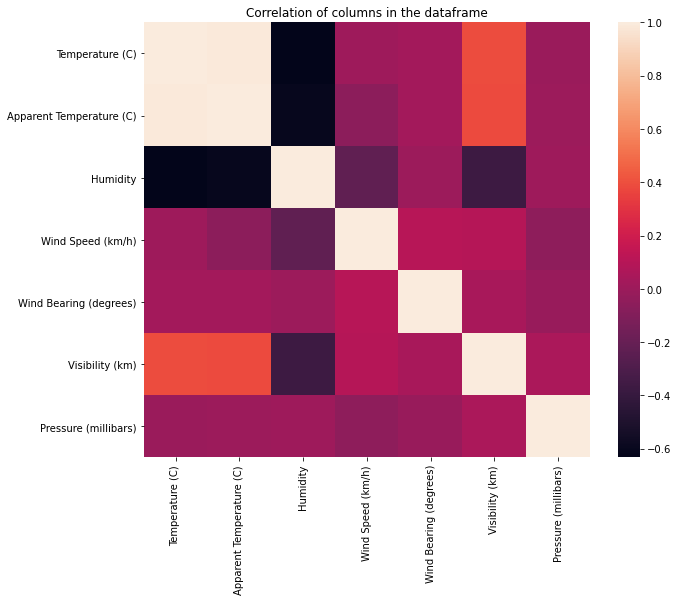

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(data=relation)
plt.title("Correlation of columns in the dataframe")
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')
plt.show()

### Changing Formatted Date to Datetime

In [17]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  float64            
 8   Visibility (km)           96453 non-null  float64            
 9   Pressure (millibars)      96453 non-null  float64            
 10  Daily Summary             96453 non-null  object             
dtypes: datetime64[n

### Creating a new DataFrame for Apparent Temperature and Humidity

- <b>Resampling</b> can be done, since it is a convenient method for frequency conversion.
- Thus we need to produce a *datetime* like index and convert <code>hourly</code> to <code>monthly</code> data.

In [18]:
data = data.set_index("Formatted Date")

In [19]:
df_column = ['Apparent Temperature (C)', 'Humidity']
df_monthly_mean = data[df_column].resample("MS").mean() #MS-Month Starting
df_monthly_mean.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


## Exploratory Data Analysis

<b>As per our Null Hypothesis H0, we need to check "Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming"</b>

### Regression Ploting

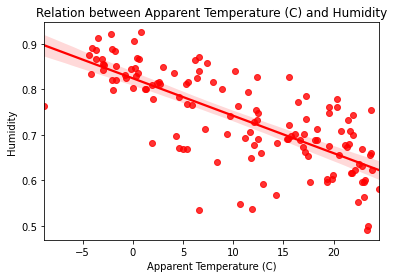

In [20]:
sns.regplot(data=df_monthly_mean, x="Apparent Temperature (C)", y="Humidity", color="r")
plt.title("Relation between Apparent Temperature (C) and Humidity")
plt.savefig('plot2.png', dpi=300, bbox_inches='tight')
plt.show()

> Observation<br>

There might be a <code>Negative Slope Linear Relationship</code> between *Apparent Temperature* and *Humidity*

### Yearly Variation of Apparent Temperature and Humidity

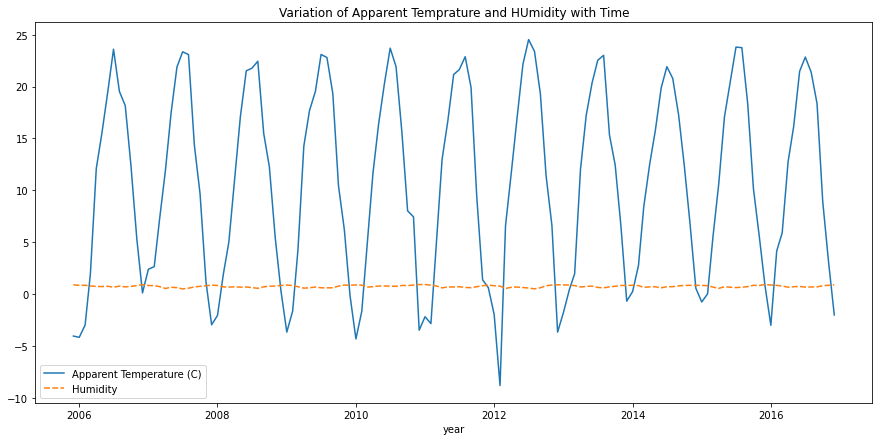

In [21]:
plt.figure(figsize=(15,7))
sns.lineplot(data= df_monthly_mean)
plt.xlabel('year')
plt.title('Variation of Apparent Temprature and HUmidity with Time')
plt.savefig('plot3.png', dpi=300, bbox_inches='tight')
plt.show()

> Observation <br>
1. "Humidity" remained constant from 2006 - 2016
2. "Apparent Temperature (C)" frequently changed from 2006 - 2016
    - As we can see that both the peaks and the troughs in the graph are almost same throughout the 10 year period.

### Month-wise Variation of Apparent Temperature and Humidity through the years

Creating a <b>func()</b> for plotting variation for *each month*.

In [22]:
def label_color(month):
    if month == 1:
        return 'January','black'
    elif month == 2:
        return 'February','brown'
    elif month == 3:
        return 'March','red'
    elif month == 4:
        return 'April','orange'
    elif month == 5:
        return 'May','yellow'
    elif month == 6:
        return 'June','blue'
    elif month == 7:
        return 'July','violet'
    elif month == 8:
        return 'August','pink'
    elif month == 9:
        return 'September','grey'
    elif month == 10:
        return 'October','pink'
    elif month == 11:
        return 'November','purple'
    else:
        return 'December','green'

def sns_month_plot(month):
    plt.figure(figsize=(15,7))
    label = label_color(month)[0]
    plt.title('Apparent Temperature Vs Humidity for {}'.format(label))
    data = df_monthly_mean[df_monthly_mean.index.month == month]
    plt.xlabel('YEAR')
    sns.lineplot(data=data, marker='o')
    name="month"+str(month)+".png"
    plt.savefig(name, dpi=300, bbox_inches='tight')  
    plt.show()
    

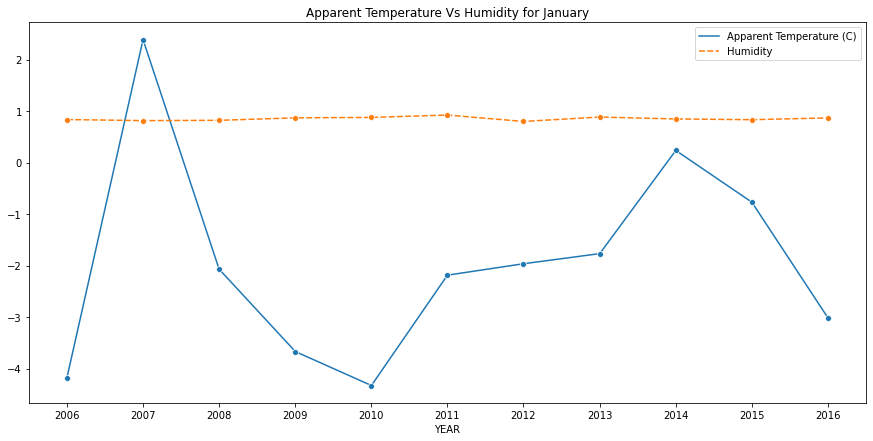

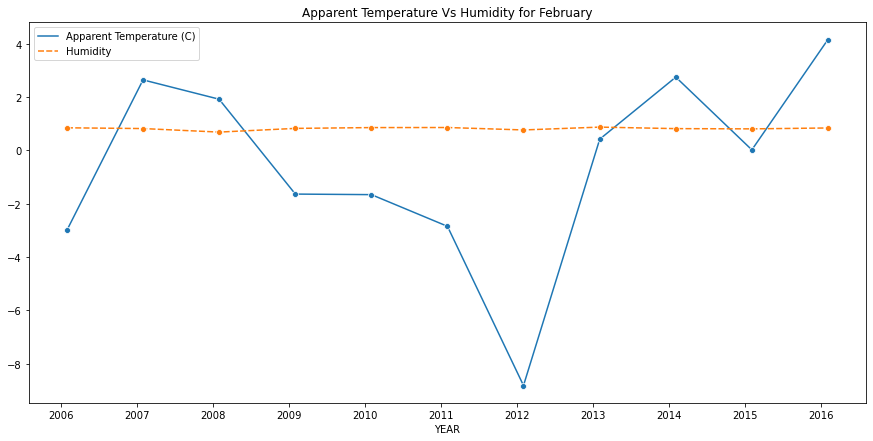

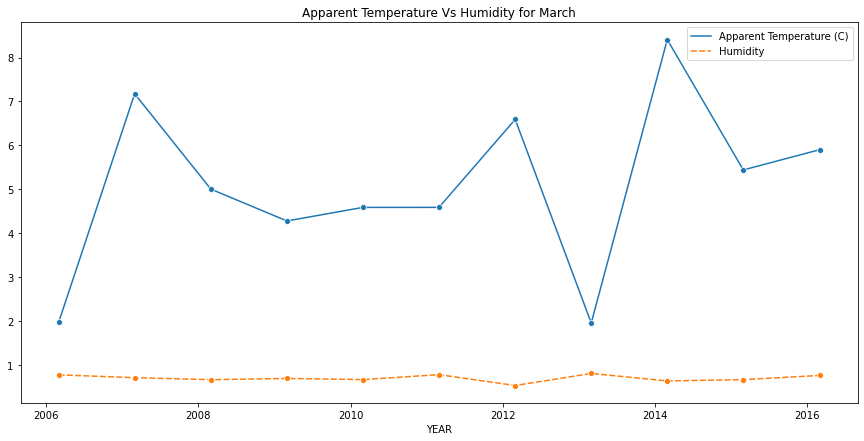

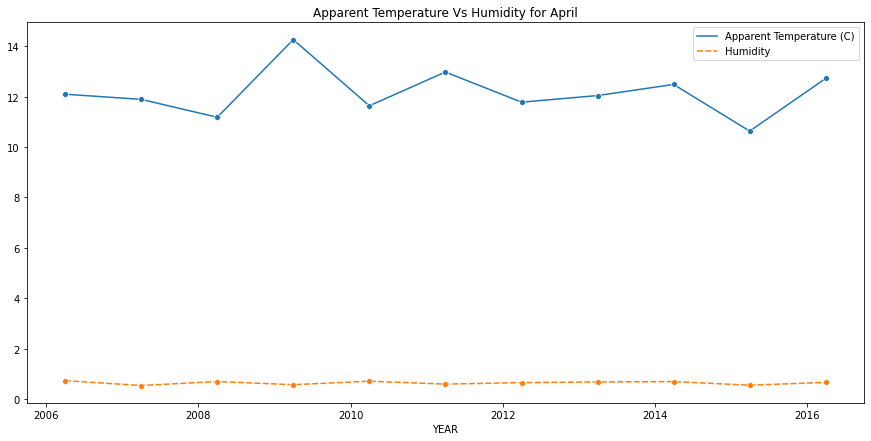

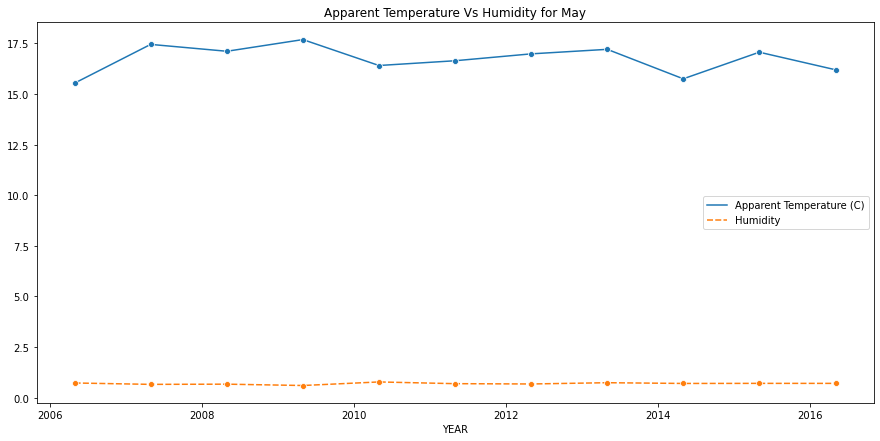

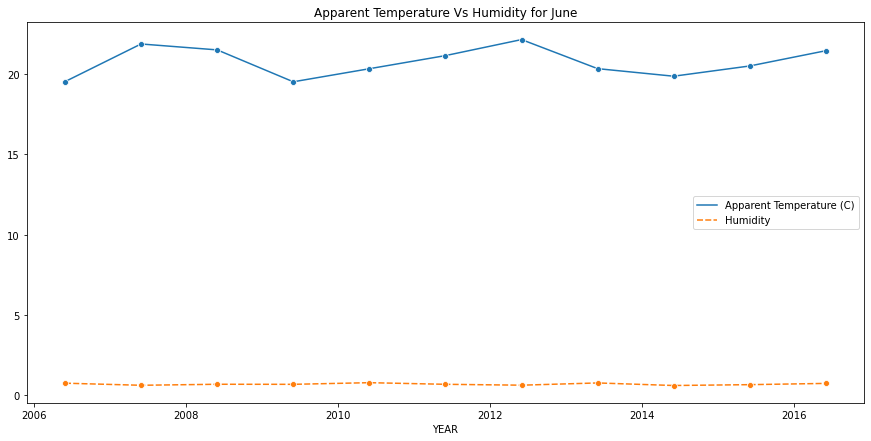

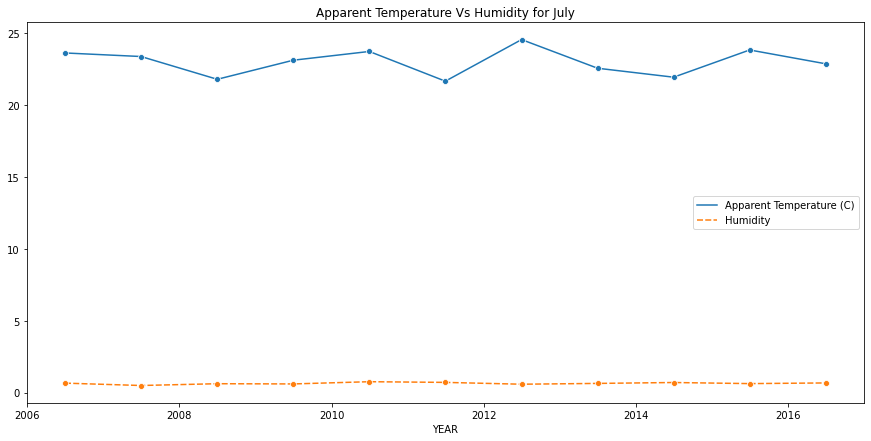

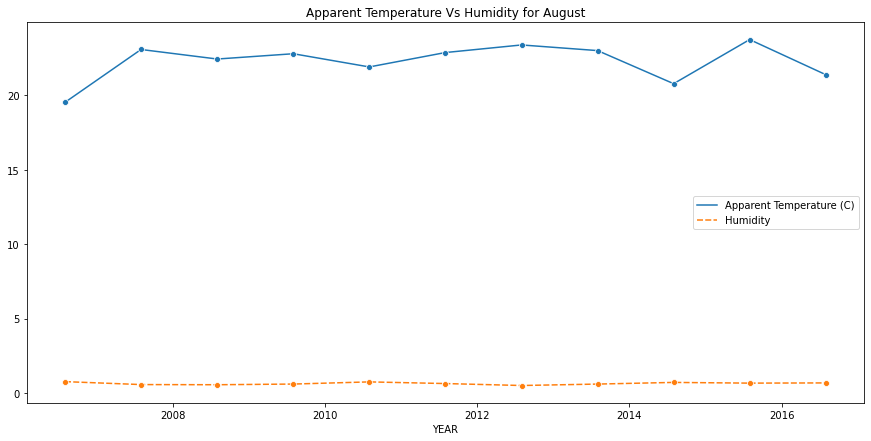

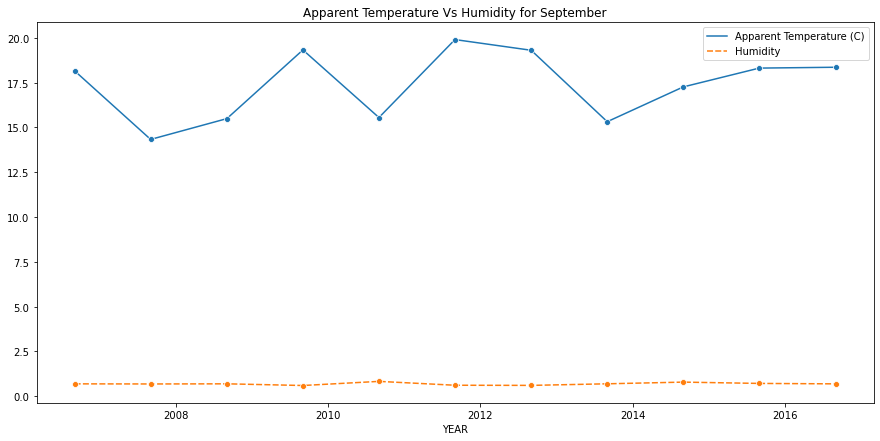

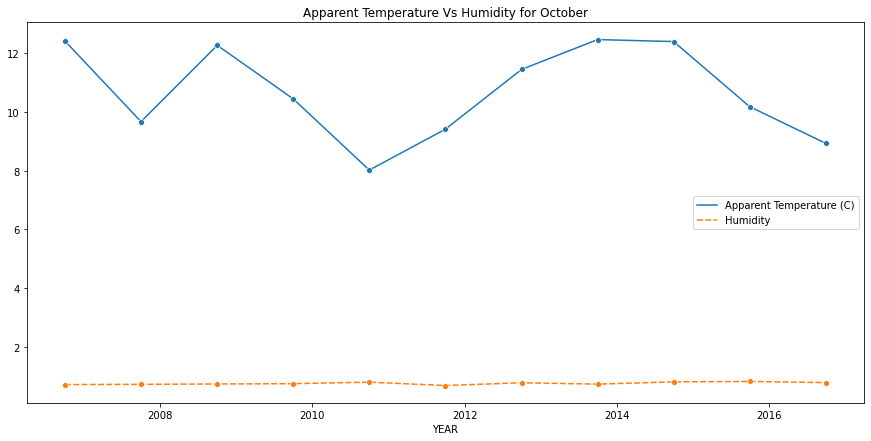

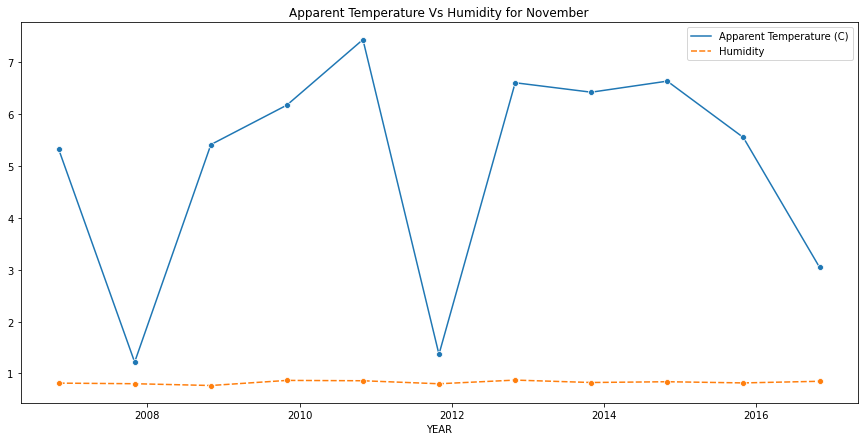

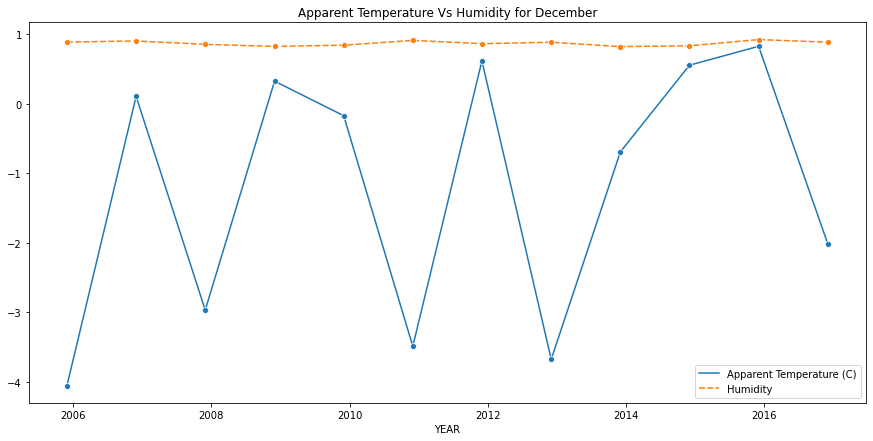

In [23]:
for month in range(1,13):
    sns_month_plot(month)

### Plotting Humidity & Apparent Temperature for all months

Creating a function for plotting all months

In [24]:
TEMP_DATA = df_monthly_mean.iloc[:,0]
HUM_DATA = df_monthly_mean.iloc[:,1]

def plot_month(month, data):
    label, color = label_color(month)
    mdata = data[data.index.month == month]
    sns.lineplot(data=mdata,label=label,color=color,marker='o')

def sns_plot(title, data):
    plt.figure(figsize=(14,8))
    plt.title(title)
    plt.xlabel('YEAR')
    for i in range(1,13):
        plot_month(i,data)
    plt.savefig('plot4.png', dpi=300, bbox_inches='tight')   
    plt.show()

Month-wise Plot for Apparent Temperature of 10 years

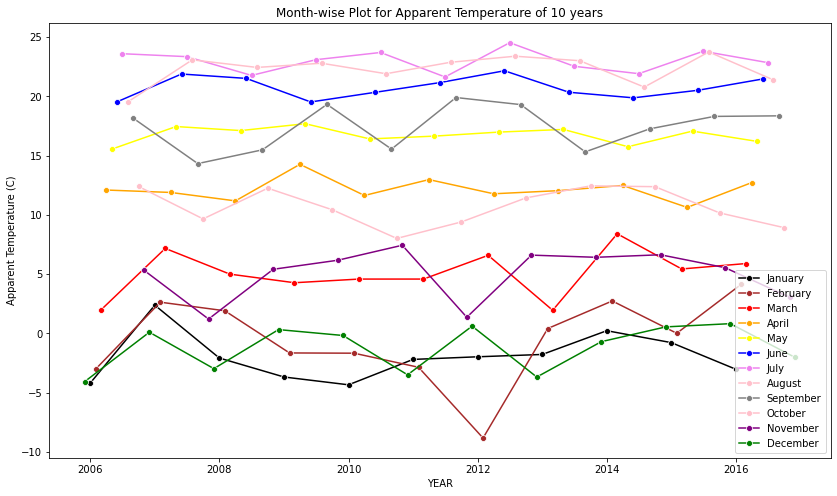

In [25]:
title = 'Month-wise Plot for Apparent Temperature of 10 years' 
sns_plot(title, TEMP_DATA)

Month-wise Plot for Humidity of 10 years

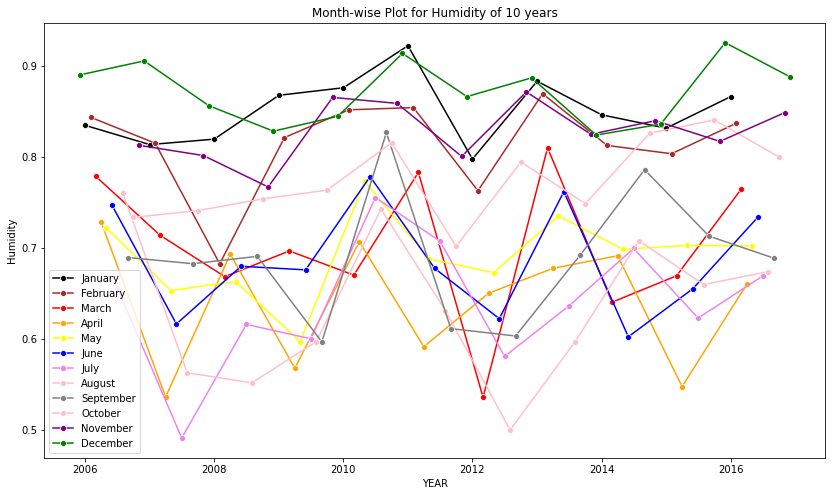

In [26]:
title = 'Month-wise Plot for Humidity of 10 years' 
sns_plot(title, HUM_DATA)

## Conclusion

> As from the above plots, we can understand that, <code>'The Apparent Temperature'</code> has a tremendous fluctuation over the time period. There is a sharp rise of temperature between year 2008-2009 which again decreases in year 2009-2010. It is observed that the average Apparent Temperature is at its peak in year 2009 which further drops to its lowest in year 2015. Whereas the average Humidity has remained nearly constant over the period of time.

This clears that our *Null Hypothesis* is having a <code>True Positive</code> impact. i.e, global warming has caused an uncertain fluctuation of average Apparent Temperature over the past 10 years